In [4]:
!pip install opencv-python


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import time

from IPython import display
import glob
import imageio
import os
from PIL import Image
import random
import copy 
from cv2 import resize, INTER_CUBIC

import tensorflow as tf
#import tensorflow_gan as tfgan
IMG_SHAPE = (64, 64)
MAX_DATASET_SIZE = 2000

In [6]:
print('Tensorflow version ' + tf.__version__)

Tensorflow version 2.3.0


In [7]:
data = []
for dirname, _, filenames in os.walk('C:\\Users\\Krzysztof Kramarz\\Desktop\\GAN-Project\\Data\\anime_faces\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data.append(np.asarray(Image.open(os.path.join(dirname, filename)).resize(IMG_SHAPE)))
        if len(data) >= MAX_DATASET_SIZE:
            break
data = np.array(data)

N-Project\Data\anime_faces\11575_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11576_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11577_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11578_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11579_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\1157_2001.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11580_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11581_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11582_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11583_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11584_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11585_2005.jpg
C:\Users\Krzysztof Kramarz\Desktop\GAN-Project\Data\anime_faces\11586_2005.jpg
C:\Users\Kr

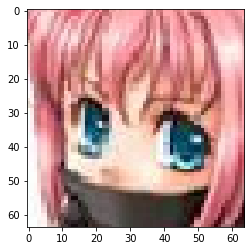

In [8]:
plt.imshow(data[100,:,:,:]) #, cmap = 'gray')

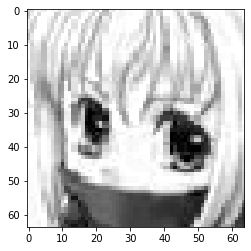

In [9]:
plt.imshow(data[100,:,:,0], cmap = 'gray')

In [10]:
data = (copy.deepcopy(data)  - 127.5) / 127.5

In [11]:
def is_multiple_of_2(x):
    """
    function that returns True if given number x is a multiple of 2
    
    args:
    x: number of type integer that we want to checkk if is a multiple of 2
    
    example:
    >>>is_multiple_of_2(8)
    True
    >>>is_multiple_of_2(15)
    False
    """
    
    if x == 2:
        return True
    elif x and (x%2) == 0 and x!=0:
        return is_multiple_of_2(x/2)
    else:
        return False


In [12]:
(2,2)[0] * 2

4

In [13]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)



In [14]:
"""
wasserstein_gradient_penalty
All losses must be able to accept 1D or 2D Tensors, so as to be compatible with
patchGAN style losses (https://arxiv.org/abs/1611.07004).
To make these losses usable in the TF-GAN framework, please create a tuple
version of the losses with `losses_utils.py`.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import tensorflow as tf
# from tensorflow_gan.python import contrib_utils as contrib


__all__ = [
    'acgan_discriminator_loss',
    'acgan_generator_loss',
    'least_squares_discriminator_loss',
    'least_squares_generator_loss',
    'modified_discriminator_loss',
    'modified_generator_loss',
    'minimax_discriminator_loss',
    'minimax_generator_loss',
    'wasserstein_discriminator_loss',
    'wasserstein_hinge_generator_loss',
    'wasserstein_hinge_discriminator_loss',
    'wasserstein_generator_loss',
    'wasserstein_gradient_penalty',
    'mutual_information_penalty',
    'combine_adversarial_loss',
    'cycle_consistency_loss',
]


def _to_float(tensor):
    return tf.cast(tensor, tf.float32)


# Wasserstein losses from `Wasserstein GAN` (https://arxiv.org/abs/1701.07875).
# def wasserstein_generator_loss(
#     discriminator_gen_outputs,
#     weights=1.0,
#     scope=None,
#     loss_collection=tf.compat.v1.GraphKeys.LOSSES,
#     reduction=tf.compat.v1.losses.Reduction.SUM_BY_NONZERO_WEIGHTS,
#     add_summaries=False):
#     """Wasserstein generator loss for GANs.
#   See `Wasserstein GAN` (https://arxiv.org/abs/1701.07875) for more details.
#   Args:
#     discriminator_gen_outputs: Discriminator output on generated data. Expected
#       to be in the range of (-inf, inf).
#     weights: Optional `Tensor` whose rank is either 0, or the same rank as
#       `discriminator_gen_outputs`, and must be broadcastable to
#       `discriminator_gen_outputs` (i.e., all dimensions must be either `1`, or
#       the same as the corresponding dimension).
#     scope: The scope for the operations performed in computing the loss.
#     loss_collection: collection to which this loss will be added.
#     reduction: A `tf.losses.Reduction` to apply to loss.
#     add_summaries: Whether or not to add detailed summaries for the loss.
#   Returns:
#     A loss Tensor. The shape depends on `reduction`.
#     """
#     with tf.compat.v1.name_scope(scope, 'generator_wasserstein_loss',
#                                (discriminator_gen_outputs, weights)) as scope:
#         discriminator_gen_outputs = _to_float(discriminator_gen_outputs)

#     loss = - discriminator_gen_outputs
#     loss = tf.compat.v1.losses.compute_weighted_loss(loss, weights, scope,
#                                                      loss_collection, reduction)

#     if add_summaries:
#         tf.compat.v1.summary.scalar('generator_wass_loss', loss)

#     return loss


# def wasserstein_discriminator_loss(
#     discriminator_real_outputs,
#     discriminator_gen_outputs,
#     real_weights=1.0,
#     generated_weights=1.0,
#     scope=None,
#     loss_collection=tf.compat.v1.GraphKeys.LOSSES,
#     reduction=tf.compat.v1.losses.Reduction.SUM_BY_NONZERO_WEIGHTS,
#     add_summaries=False):
#   """Wasserstein discriminator loss for GANs.
#   See `Wasserstein GAN` (https://arxiv.org/abs/1701.07875) for more details.
#   Args:
#     discriminator_real_outputs: Discriminator output on real data.
#     discriminator_gen_outputs: Discriminator output on generated data. Expected
#       to be in the range of (-inf, inf).
#     real_weights: Optional `Tensor` whose rank is either 0, or the same rank as
#       `discriminator_real_outputs`, and must be broadcastable to
#       `discriminator_real_outputs` (i.e., all dimensions must be either `1`, or
#       the same as the corresponding dimension).
#     generated_weights: Same as `real_weights`, but for
#       `discriminator_gen_outputs`.
#     scope: The scope for the operations performed in computing the loss.
#     loss_collection: collection to which this loss will be added.
#     reduction: A `tf.losses.Reduction` to apply to loss.
#     add_summaries: Whether or not to add summaries for the loss.
#   Returns:
#     A loss Tensor. The shape depends on `reduction`.
#   """
#   with tf.compat.v1.name_scope(
#       scope, 'discriminator_wasserstein_loss',
#       (discriminator_real_outputs, discriminator_gen_outputs, real_weights,
#        generated_weights)) as scope:
#     discriminator_real_outputs = _to_float(discriminator_real_outputs)
#     discriminator_gen_outputs = _to_float(discriminator_gen_outputs)
#     discriminator_real_outputs.shape.assert_is_compatible_with(
#         discriminator_gen_outputs.shape)

#     loss_on_generated = tf.compat.v1.losses.compute_weighted_loss(
#         discriminator_gen_outputs,
#         generated_weights,
#         scope,
#         loss_collection=None,
#         reduction=reduction)
#     loss_on_real = tf.compat.v1.losses.compute_weighted_loss(
#         discriminator_real_outputs,
#         real_weights,
#         scope,
#         loss_collection=None,
#         reduction=reduction)
#     loss = loss_on_generated - loss_on_real
#     tf.compat.v1.losses.add_loss(loss, loss_collection)

#     if add_summaries:
#       tf.compat.v1.summary.scalar('discriminator_gen_wass_loss',
#                                   loss_on_generated)
#       tf.compat.v1.summary.scalar('discriminator_real_wass_loss', loss_on_real)
#       tf.compat.v1.summary.scalar('discriminator_wass_loss', loss)

#   return loss


In [15]:
def D_loss(D_real, D_fake):
    -tf.reduce_mean(tf.math.log(D_real) + tf.math.log(1. - D_fake))

def G_loss(D_fake):
    return -tf.reduce_mean(tf.math.log(D_fake))

In [16]:
test_g = tf.keras.models.Sequential()
test_g.add(tf.keras.layers.Dense(4, activation = 'relu'))
test_g.add(tf.keras.layers.Dense(4, activation = 'relu'))
test_g.add(tf.keras.layers.Dense(4, activation = 'relu'))
test_g.layers[-1].activation = tf.keras.activations.linear
for layer in test_g.layers:
    print(layer.activation)
del test_g


<function relu at 0x0000024288FB78B8>
<function relu at 0x0000024288FB78B8>
<function linear at 0x0000024288FB7E58>


In [43]:
class GAN(object):
    def __init__(self, data, img_shape = IMG_SHAPE, noise_shape = 1000, train_data_size = 0.5, batch_size = 256, buffer_size = 60000, generator_loss = generator_loss, discriminator_loss = discriminator_loss, discriminator_type = 'discriminator'):
        
        """GAN Class init function.

          Args:
            data: dataset that GAN is supposed to learn to mimic
            img_shape: first 2 shapes of each image in the dataset, both numbers should be same,  and multiple of 2
            noise_shape: size of the array that will be the GAN input
            batch_size: size of data batch that will be calculated in one step of training 
            buffer_size: A tf.int64 scalar tf.Tensor, representing the number of elements 
                                from this dataset from which the new dataset will sample.
            generator_loss: function that will represent ghow good generator is
            discriminator_loss: function that will represent how good discriminator is
            discriminator_type: default "discriminator" means that GAN will be trained 
                                in default settings with basic loss functions. If you want to use 
                                wasserstein loss, this value should be changed to "critique". 
          """ 
        self.n_epochs = 0
        self.generator = tf.keras.models.Sequential()
        self.discriminator = tf.keras.models.Sequential()
        self.data_dimensions = data.shape[3]
        
        if img_shape[0]!=img_shape[1] or is_multiple_of_2(img_shape[0]) == False or is_multiple_of_2(img_shape[1]) == False:
            print('dupa')
            return None
        else:
            self.img_shape = img_shape
        
        self.curr_shape = (32,32)
        
        self.noise_shape = noise_shape
        self.BUFFER_SIZE = buffer_size
        self.BATCH_SIZE = batch_size
        self.train_data = copy.deepcopy(data)


        self.generator_loss = generator_loss
        self.discriminator_loss = discriminator_loss
        self.generator_optimizer = tf.keras.optimizers.Adam(1e-4)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
        
        self.loss = None

        self.checkpoint_dir = './training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                         discriminator_optimizer=self.discriminator_optimizer,
                                         generator=self.generator,
                                         discriminator=self.discriminator)
        self.num_examples_to_generate = 16

        # We will reuse this seed overtime (so it's easier)
        # to visualize progress in the animated GIF)
        self.seed = tf.random.normal([self.num_examples_to_generate, self.noise_shape])

        self.create_generator()
        if discriminator_type == 'discriminator':
            self.create_discriminator()
    
    def create_generator(self):
        """
        function that creates model that is supposed to trick 
        our judge that his generated output is real image
        """
        self.generator.add(tf.keras.layers.Dense(512*4*4, use_bias=False, input_shape=(self.noise_shape,)))
        self.generator.add(tf.keras.layers.BatchNormalization())
        self.generator.add(tf.keras.layers.LeakyReLU())
        self.generator.add(tf.keras.layers.Reshape((4, 4, 512)))
        #assert self.generator.output_shape == (None, 7, 7, 512)
        
        self.generator.add(tf.keras.layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        assert self.generator.output_shape == (None, 8, 8, 256)
        self.generator.add(tf.keras.layers.BatchNormalization())
        self.generator.add(tf.keras.layers.LeakyReLU())

        self.generator.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        assert self.generator.output_shape == (None, 16, 16, 128)
        self.generator.add(tf.keras.layers.BatchNormalization())
        self.generator.add(tf.keras.layers.LeakyReLU())

        
        self.generator.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        assert self.generator.output_shape == (None, 32, 32, 64)
        self.generator.add(tf.keras.layers.BatchNormalization())
        self.generator.add(tf.keras.layers.LeakyReLU())
        
        self.generator.add(tf.keras.layers.Conv2DTranspose(self.data_dimensions, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
        assert self.generator.output_shape == (None, 32, 32, self.data_dimensions)
        
        self.curr_shape = (32,32)

        
    def create_discriminator(self, out_activation = 'sigmoid'):
        """
        depending on loss function, judge works like discriminator, or like critique
        """
        self.discriminator.add(tf.keras.layers.Conv2D(self.data_dimensions, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[self.curr_shape[0],self.curr_shape[1], self.data_dimensions]))
        self.discriminator.add(tf.keras.layers.LeakyReLU())
        self.discriminator.add(tf.keras.layers.Dropout(0.3))

        self.discriminator.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
        self.discriminator.add(tf.keras.layers.LeakyReLU())
        self.discriminator.add(tf.keras.layers.Dropout(0.3))
        
        for i in range(int(self.curr_shape[0]/64)):
            self.discriminator.add(tf.keras.layers.Conv2D(128*(i+1), (5, 5), strides=(2, 2), padding='same'))
            self.discriminator.add(tf.keras.layers.LeakyReLU())
            self.discriminator.add(tf.keras.layers.Dropout(0.3))

        self.discriminator.add(tf.keras.layers.Flatten())
        self.discriminator.add(tf.keras.layers.Dense(1)) #, activation = out_activation))
        tf.keras.utils.plot_model(self.discriminator, to_file = 'discriminator.png')
    
    def increase_resolution(self):
        self.curr_shape = (self.curr_shape[0]*2, self.curr_shape[1]*2)
        self.generator.layers[0].activation = tf.keras.activations.linear
        self.generator.add(tf.keras.layers.BatchNormalization())
        self.generator.add(tf.keras.layers.LeakyReLU())
        self.generator.add(tf.keras.layers.Conv2DTranspose(self.data_dimensions, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
        assert self.generator.output_shape == (None, self.curr_shape[0], self.curr_shape[1], self.data_dimensions)
        new_d = tf.keras.models.Sequential()
        new_d.add(tf.keras.layers.Conv2D(self.data_dimensions, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[self.curr_shape[0],self.curr_shape[1], self.data_dimensions]))
        new_d.add(tf.keras.layers.LeakyReLU())
        new_d.add(tf.keras.layers.Dropout(0.3))
        for layer in self.discriminator.layers:
            new_d.add(layer)
        self.discriminator = new_d
    
    def generate_and_save_images(self, epoch, test_input):
        # Notice `training` is set to False.
        # This is so all layers run in inference mode (batchnorm).
        predictions = self.generator(test_input, training=False)
        fig = plt.figure(figsize=(4,4))

        for i in range(predictions.shape[0]):
            plt.subplot(4, 4, i+1)
            if self.data_dimensions == 1:
                plt.imshow(predictions[i,:,:,0]* 127.5 + 127.5, cmap = 'gray')
            else:
                plt.imshow(predictions[i,:,:,:]* 127.5 + 127.5)
            plt.axis('off')

        plt.savefig('C:\\Users\\Krzysztof Kramarz\\Desktop\\GAN-Project\\epochs_images\\image_at_epoch_{:04d}.png'.format(epoch))
        #print(self.loss)
        #plt.show()


    def train_step(self, images):
        noise = tf.random.normal([self.BATCH_SIZE, self.noise_shape])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = self.generator(noise, training=True)
            real_output = self.discriminator(images, training=True)
            fake_output = self.discriminator(generated_images, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)
            self.loss = [gen_loss, disc_loss]

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

    def train(self, epochs):
        n_of_increases = int(math.log(self.img_shape[0], 2) - 5) + 1
        for _ in range(n_of_increases):
            train_data = copy.deepcopy(self.train_data)
            train_data = np.array(list(map(lambda t: resize(t, dsize = self.curr_shape, interpolation = INTER_CUBIC), train_data))).reshape(self.train_data.shape[0], self.curr_shape[0], self.curr_shape[1], self.data_dimensions)
            # plt.imshow(train_data[0,:,:,0]* 127.5 + 127.5, cmap = 'gray')
            # plt.show()
            batched_data = tf.data.Dataset.from_tensor_slices(train_data).shuffle(self.BUFFER_SIZE).batch(self.BATCH_SIZE, drop_remainder = True)
            for epoch in range(int(epochs/n_of_increases)):
                start = time.time()
                for image_batch in batched_data:
                    self.train_step(image_batch)

                # Produce images for the GIF as we go
                display.clear_output(wait=True)
                self.generate_and_save_images(epoch + 1,
                                            self.seed)

                # Save the model every 15 epochs
                if (epoch + 1) % 15 == 0:
                    self.checkpoint.save(file_prefix = self.checkpoint_prefix)
                self.n_epochs += 1
                print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start), 'current images shape: ', self.curr_shape)
            self.increase_resolution()

        # Generate after the final epoch
        display.clear_output(wait=True)
        self.generate_and_save_images(epochs,self.seed)

In [44]:
gan = GAN(data[:,:,:,2].reshape(data.shape[0], data.shape[1], data.shape[2], 1), noise_shape=128, discriminator_loss = discriminator_loss, generator_loss = generator_loss, discriminator_type='discriminator')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [47]:
gan.generator.layers[0]


In [48]:
gan.increase_resolution()

ValueError: Input 0 of layer conv2d_transpose_28 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 1]

In [29]:
gan.generator.layers